In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
import pickle


In [14]:
H_au = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/case-2-graph_Austin_True_1_13_Hs.pkl'), 'r'))

In [15]:
H_sd = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0.pkl'), 'r'))
H_error_home = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error_home.pkl'), 'r'))
H_error = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error.pkl'), 'r'))
H_params = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_params.pkl'), 'r'))
H_error_app = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/transfer/case-2/True/True/Austin-SanDiego-0-10.0_error_home_app.pkl'), 'r'))

In [6]:
H_au = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/normal/case-2/True/True/SanDiego-Austin-0-80.0.pkl'), 'r'))
H_error_home = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/normal/case-2/True/True/SanDiego-Austin-0-80.0_error_home.pkl'), 'r'))
H_error = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/normal/case-2/True/True/SanDiego-Austin-0-80.0_error.pkl'), 'r'))
H_params = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/normal/case-2/True/True/SanDiego-Austin-0-80.0_params.pkl'), 'r'))
# H_error_app = pickle.load(open(os.path.expanduser('~/git/scalable-nilm/aaai18/predictions/H/normal/case-2/True/True/SanDiego-Austin-0-80.0_error_home_app.pkl'), 'r'))

In [12]:
np.argsort(H_error)[:3]
# H_params[416]

array([416, 424,  31])

In [25]:
lr, iters, s, h, lam = H_params[416]

In [27]:
H_factors = pd.concat(H_au[lr][iters][s][h][lam])

In [33]:
import sys
sys.path.append("../code/")
from common import compute_rmse_fraction, contri, get_tensor, create_region_df_dfc_static
start = 1 
stop = 13
target_df, target_dfc, target_tensor, target_static = create_region_df_dfc_static('Austin', 2014)
static_df = pd.DataFrame(target_static, index=target_df.index)
idx = static_df.dropna(how='any').index
target_df = target_df.loc[idx]
target_dfc = target_dfc.loc[idx]
target_tensor = get_tensor(target_df, start, stop)
static_df = static_df.loc[idx]
target_static = static_df.values

In [37]:
data = pd.concat([H_factors, static_df], axis=1)

,0,1,2,3,4,0,1,2
26,3.971120,4.418009e+00,4.236614,4.298140,4.045163,0.511750,0.500,0.750
59,8.445497,1.000000e-08,5.748348,6.710640,3.312698,0.900000,0.875,1.375
94,2.101248,6.099436e-01,0.794183,2.846213,0.979152,0.428250,0.250,0.375
101,0.693045,4.302707e+00,1.341347,4.232472,2.008282,0.325000,0.375,0.625
121,5.394595,4.180613e+00,4.287053,5.540191,4.150960,0.475000,0.375,1.250
135,1.263229,1.911929e+00,2.027941,1.088795,1.430752,0.204000,0.500,0.250
222,8.497537,4.736129e+00,7.515263,8.313536,6.750093,0.550000,0.625,0.500
252,7.168700,5.925324e+00,7.055714,7.461761,6.890816,0.675000,0.500,0.500
364,3.234326,5.035063e+00,4.071867,3.489388,4.273935,0.550000,0.250,1.250
370,5.412261,3.816319e+00,4.396911,5.310757,4.849719,0.670500,0.250,1.000


In [16]:
best_show = [
    [2, 1300, 2, 3, 0.001]
]

9.64394298538


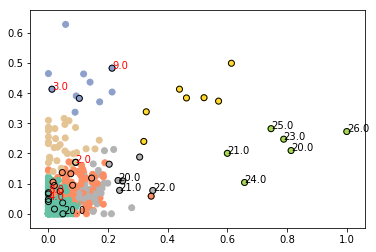

In [17]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.lines as mlines
for i in range(len(best_show)):
    # for i in range(1):
        lr, iters, season, home, lam = best_show[i]
    #     print H_params[i]
        
        H_sandiego = H_sd[lr][iters][season][home][lam]
        H_austin = H_au[lr][season][home][lam][iters]
        
        H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
        H_sandiego = H_sandiego.values
        
        ### NIPUN
        
        X = np.r_[H_austin, H_sandiego]
        print np.max(X)
        X = X/np.max(X)
        y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(X)
        x1, x2 = (-np.var(X, axis=0)).argsort()[:2]
        
        y_sd = np.zeros(len(H_sandiego))
        y_au = np.ones(len(H_austin))
        y_label = np.r_[y_au, y_sd]
        
        home_error = H_error_home[lr][iters][season][home][lam]
        home_error = np.around(home_error.values)    
        
        
        start = len(H_austin)
        d = np.random.randint(0, 2, size=(3,3,3))
        z,x,y = d.nonzero()
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(111)
    #     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
        ax.scatter(X[:, x1], X[:, x2], c = y_pred, cmap='Set2')
        ax.scatter(X[start:, x1], X[start:, x2], color='black', marker='o', facecolors='none')
    #     ax.set_color('yellow', 'red')
        # ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)
        
        max_idx = (-home_error).argsort()[:10]
        min_idx = (home_error).argsort()[:5]
        
        for j in max_idx:
            ax.annotate(home_error[j], (X[j+start, x1],X[j+start, x2]))
        for j in min_idx:
            ax.annotate(home_error[j], (X[j+start, x1],X[j+start, x2]), color='red')
            
#         line1, = ax.scatter([], [], marker='o', label='Austin', colormap='Set2')
#         line2, = plt.plot([], marker='o', label='SanDiego')

#         blue_line = mlines.Line2D([], [], color='blue', marker='*',
#                           markersize=15, label='Blue stars')
#         plt.legend(handles=[blue_line])
#         plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

        plt.savefig("../results/Home_factors_{}_{}_{}_{}_{}.pdf".format(lr, iters, season, home, lam), format='pdf')

In [ ]:
for i in range(len(best_show)):
    # for i in range(1):
        lr, iters, season, home, lam = best_show[i]
        print H_params[i]
        
        H_sandiego = H_sd[lr][iters][season][home][lam]
        H_austin = H_au[lr][season][home][lam][iters]
        
        H_sandiego = pd.DataFrame(pd.concat(H_sandiego))
        H_sandiego = H_sandiego.values
        
        X = np.r_[H_austin, H_sandiego]
        print np.max(X)
        X = X/np.max(X)
        y_pred = KMeans(n_clusters=7, random_state=0).fit_predict(X)
        x1, x2 = (-np.var(X, axis=0)).argsort()[:2]
        
        y_sd = np.zeros(len(H_sandiego))
        y_au = np.ones(len(H_austin))
        y_label = np.r_[y_au, y_sd]
        
        home_error = H_error_home[lr][iters][season][home][lam]
        home_error = np.around(home_error.values) 
        
        app_error = np.around(H_error_app[lr][iters][season][home][lam].values)
        
        
        start = len(H_austin)
        d = np.random.randint(0, 2, size=(3,3,3))
        z,x,y = d.nonzero()
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')
        ax = fig.add_subplot(111)
    #     ax.scatter(X[:, x1], X[:, x2], c = y_label, cmap='autumn')
        ax.scatter(X[:, x1], X[:, x2], c = y_pred, cmap='Set2')
        ax.scatter(X[start:, x1], X[start:, x2], color='black', marker='o', facecolors='none')
    #     ax.set_color('yellow', 'red')
        # ax.scatter(X[:, 2], X[:, 0], X[:,1], zdir='z', c= y_label)
        
    #     max_idx = (-home_error).argsort()[:10]
    #     min_idx = (home_error).argsort()[:5]
        hvac = app_error[:, 2]
        fridge = app_error[:, 1]
    #     dw = app_error[:, 5]
    
        max_hvac = (-hvac).argsort()[:5]
        max_fridge = (-fridge).argsort()[:5]
    #     max_dw = (-dw).argsort()[:5]
        
        for i in max_hvac:
            ax.annotate(hvac[i], (X[i+start, x1],X[i+start, x2]))
        for i in max_fridge:
            ax.annotate(fridge[i], (X[i+start, x1],X[i+start, x2]), color='red')
    #     for i in max_dw:
    #         ax.annotate(dw[i], (X[i+start, x1],X[i+start, x2]), color='blue')
            
    #     print \~/git/task3/demo_{}_{}_{}_{}_{}.png\.format(lr, iters, season, home, lam)
    
        plt.savefig("../results/Home_factors_appliance_{}_{}_{}_{}_{}.pdf".format(lr, iters, season, home, lam), format='pdf')